# LGMVIP - Data Science Intern

# TASK 3 : Prediction using Decision Tree Algorithm

# Author : Kaustuk Kale

# Import required libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df=df.drop(columns="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Basic Info of Data

In [5]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
dict={
    "Iris-setosa":"1",
    "Iris-versicolor":"2",
    "Iris-virginica":"3"
}

In [10]:
for key,value in dict.items():
    df["Species"].replace(key,value,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [11]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

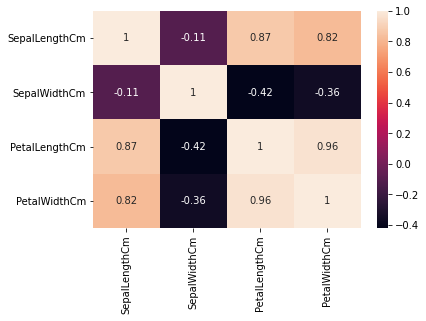

In [12]:
sns.heatmap(df.corr(),annot=True)

# EDA

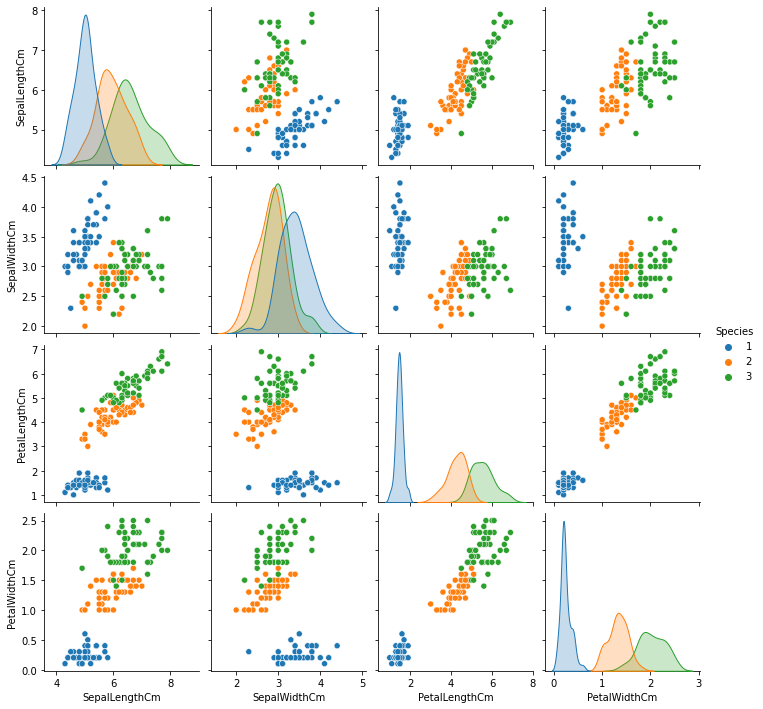

In [13]:
sns.pairplot(df,hue="Species")

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

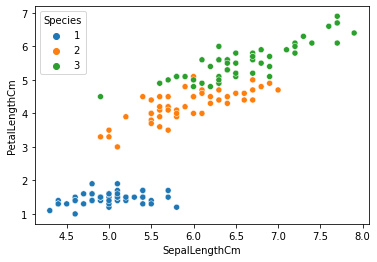

In [14]:
sns.scatterplot(x=df["SepalLengthCm"],y=df["PetalLengthCm"],hue=df["Species"])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

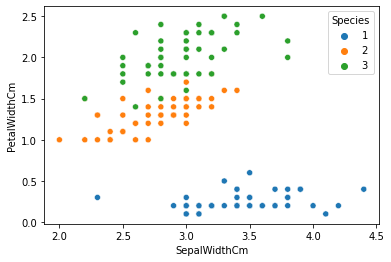

In [15]:
sns.scatterplot(x=df["SepalWidthCm"],y=df["PetalWidthCm"],hue=df["Species"])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

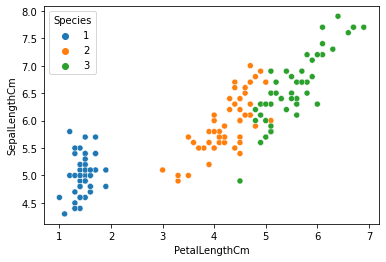

In [16]:
sns.scatterplot(x=df["PetalLengthCm"],y=df["SepalLengthCm"],hue=df["Species"])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

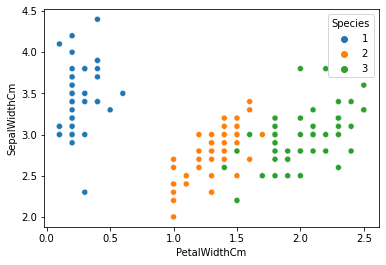

In [17]:
sns.scatterplot(x=df["PetalWidthCm"],y=df["SepalWidthCm"],hue=df["Species"])

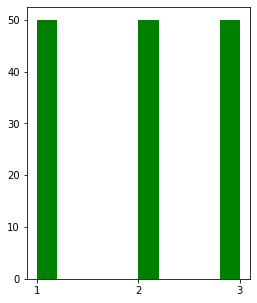

In [18]:
plt.figure(figsize=(4,5))
plt.hist(df[["Species"]],color="Green")
plt.show()

# Training the Model

In [19]:
x=df.drop(columns="Species")
y=df["Species"]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [22]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

# Accuracy

In [23]:
print("Training Accuracy: ",dtc.score(x_train,y_train)*100)
print("Testing Accuracy: ",dtc.score(x_test,y_test)*100)

Training Accuracy:  100.0
Testing Accuracy:  93.33333333333333


# Model Evaluation

In [24]:
y_pred=dtc.predict(x_test)

In [25]:
y_actual=y_test

# Confussion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_actual,y_pred)

array([[14,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 14]], dtype=int64)

# Classification Report

In [27]:
from sklearn.metrics import classification_report

In [28]:
report=classification_report(y_actual,y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      0.88      0.90        16
           3       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



# r2Score

In [29]:
from sklearn.metrics import r2_score
r2score=r2_score(y_actual,y_pred)
r2score

0.8964723926380368

# Visualization of Decision Tree Classifier

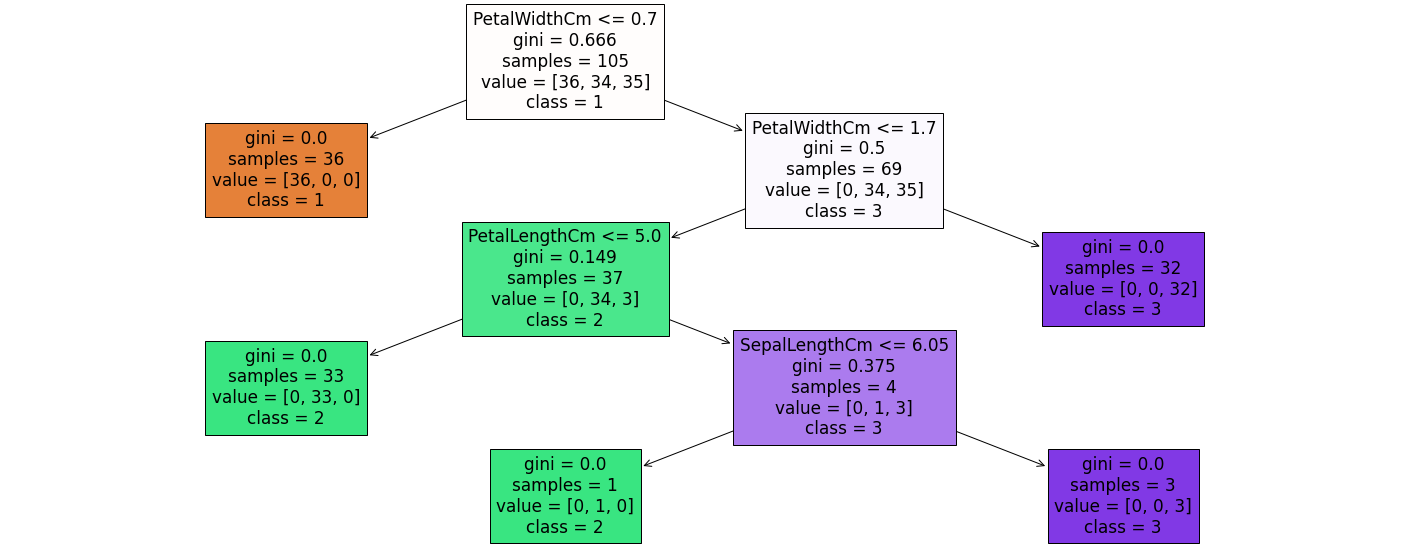

In [33]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
decision_tree=plot_tree(dtc,feature_names=x.columns,class_names=["1","2","3"],filled=True)